In [28]:
from scipy.stats import pareto, lognorm
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# The ECDF of jobs
x = np.array([5, 10, 30, 50, 100, 250])
yy = np.array([126612, 16598, 12576, 2865, 2065, 1467])
y = np.cumsum(yy)/ np.sum(yy)

In [138]:
log_f = lambda x, s, loc, scale: lognorm.cdf(x, s, loc, scale)

In [140]:
s, loc, scale = curve_fit(log_f, x, y, [1, 0, 1])[0]

In [141]:
pareto_a = curve_fit(pareto.cdf, x, y, [1])[0][0]

In [142]:
xgrid = np.linspace(1, 250, 200)
fit_pareto = pareto.cdf(xgrid, pareto_a)
fit_lognorm = lognorm.cdf(xgrid, s, 0, scale)

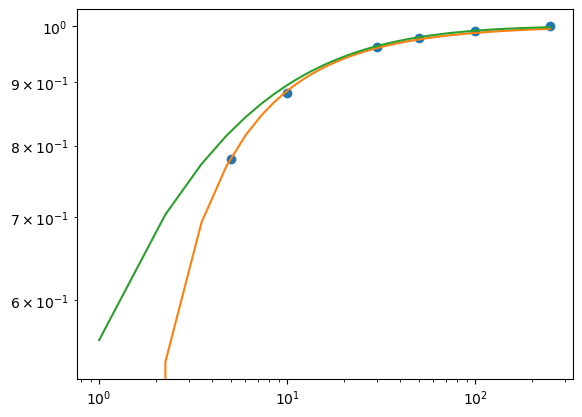

In [143]:
plt.loglog(x, y, 'o')
plt.loglog(xgrid, fit_pareto)
plt.loglog(xgrid, fit_lognorm);

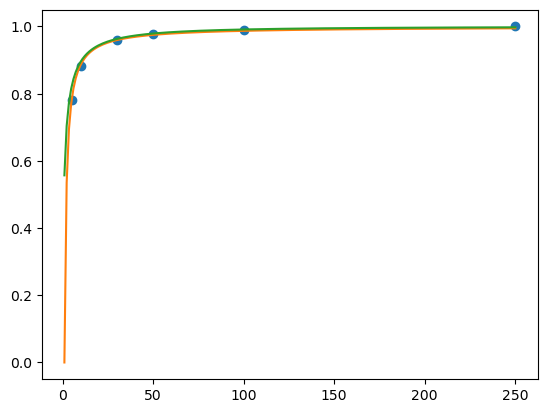

In [144]:
plt.plot(x, y, 'o')
plt.plot(xgrid, fit_pareto)
plt.plot(xgrid, fit_lognorm);

In [158]:
np.mean( [np.sum(pareto(pareto_a).rvs(163330)) for i in range(1000)])

6460530.6589360135

In [145]:
163330*lognorm(s, loc, scale).mean()

1246131.475259751

In [137]:
pareto_a

0.9431825642108478

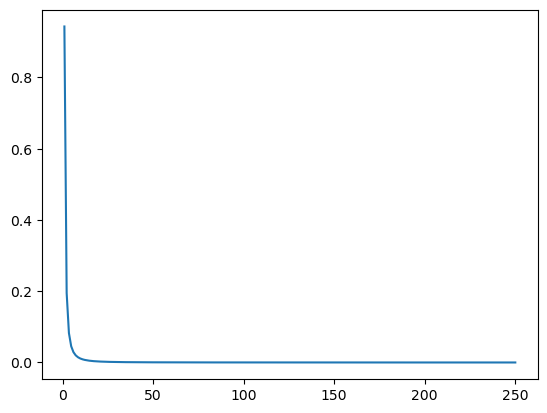

In [148]:
plt.plot(xgrid, pareto.pdf(xgrid, pareto_a))

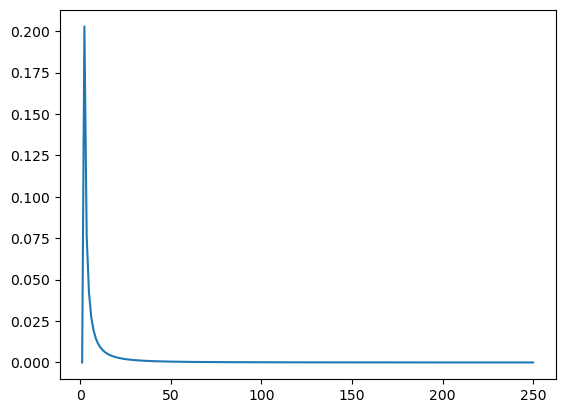

In [149]:
plt.plot(xgrid, lognorm.pdf(xgrid, s, loc, scale))